# VAMOS Quickstart

Run NSGA-II on ZDT1 with `run_nsgaii()` - one function for all use cases.

In [1]:
from vamos import run_nsgaii


## Discover Available Operators

Use the registry to find out which crossover and mutation operators are available for your problem encoding (e.g., "real", "binary").

In [2]:
from vamos.engine.algorithms_registry import available_crossover_methods, available_mutation_methods

print("Available Real Crossovers:", available_crossover_methods("real"))
print("Available Real Mutations: ", available_mutation_methods("real"))

Available Real Crossovers: ('arithmetic', 'blx_alpha', 'pcx', 'sbx', 'spx', 'undx')
Available Real Mutations:  ('cauchy', 'gaussian', 'linked_polynomial', 'non_uniform', 'pm', 'uniform', 'uniform_reset')


## Minimal Example

Just specify the problem - everything else uses sensible defaults:

=== VAMOS Quick Result ===
Algorithm: NSGAII
Solutions: 100
Objectives: 2
Evaluations: 10000
Seed: 42

Objective ranges:
  f1: [0.000001, 0.998910]
  f2: [0.020138, 1.479031]

Hypervolume (auto ref): 1.419497


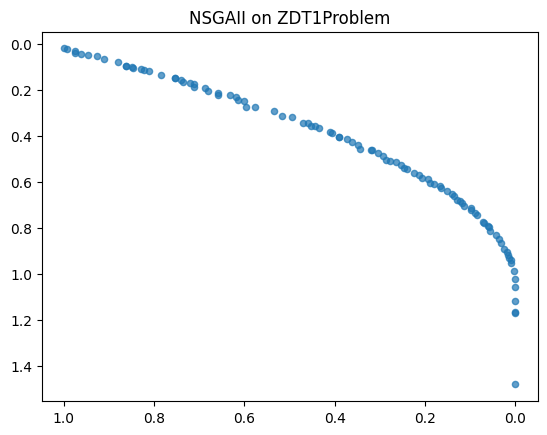

<Axes: title={'center': 'NSGAII on ZDT1Problem'}>

In [3]:
result = run_nsgaii("zdt1")
result.summary()
result.plot()

## With Basic Parameters

Customize problem size and budget:

=== VAMOS Quick Result ===
Algorithm: NSGAII
Solutions: 100
Objectives: 2
Evaluations: 20000
Seed: 42

Objective ranges:
  f1: [0.000000, 0.999927]
  f2: [0.003413, 1.053937]

Hypervolume (auto ref): 0.929631


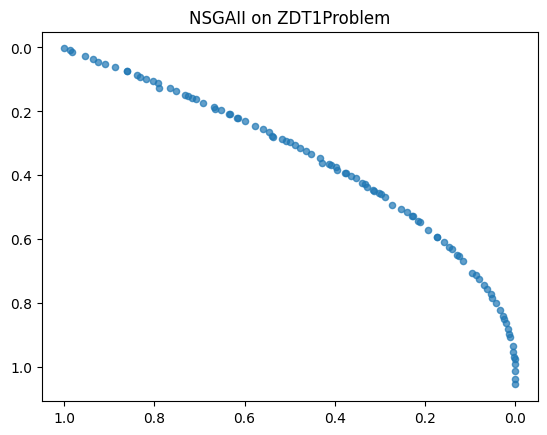

<Axes: title={'center': 'NSGAII on ZDT1Problem'}>

In [4]:
result = run_nsgaii(
    "zdt1",
    n_var=30,
    max_evaluations=20000,
    pop_size=100,
    seed=42,
)
result.summary()
result.plot()

## Full Configuration (Higher Quality)

Use a larger budget and archive for a smoother, higher-quality front (slower run):


=== VAMOS Quick Result ===
Algorithm: NSGAII
Solutions: 200
Objectives: 2
Evaluations: 100000
Seed: 42

Objective ranges:
  f1: [0.000000, 0.999988]
  f2: [0.000040, 1.100347]

Hypervolume (auto ref): 0.994794


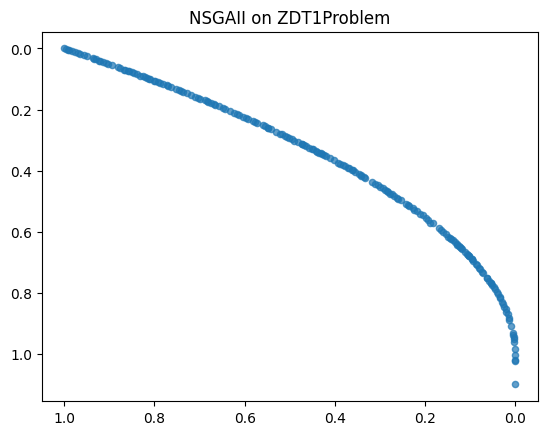

<Axes: title={'center': 'NSGAII on ZDT1Problem'}>

In [5]:
result = run_nsgaii(
    "zdt1",
    n_var=12,
    seed=42,
    # Budget (higher for better front quality)
    max_evaluations=100000,
    pop_size=200,
    offspring_size=200,
    # Operators
    crossover="sbx",
    crossover_prob=0.9,
    crossover_eta=20.0,
    mutation="pm",
    mutation_prob="1/n",
    mutation_eta=20.0,
    # Selection & survival
    selection_pressure=2,
    # Archive & results
    archive_size=200,
    archive_type="moocore",
    result_mode="external_archive",
)
result.summary()
result.plot()
